<a href="https://colab.research.google.com/github/JUNYA-727/Tensorflow_CNN_study/blob/main/tensorflow4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [ ]:
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

In [ ]:
with open('/content/sign_mnist_test.csv') as filename:
  csv_reader=csv.reader(filename,delimiter=',')
  first_line=True
  for i in csv_reader:
    print(i)

In [ ]:
def get_data(filename):
  with open(filename) as training_file:
      ### START CODE HERE
      csv_reader = csv.reader(training_file, delimiter=',')
      first_line=True
      temp_images=[]
      temp_labels=[]

      for i in csv_reader:
        if first_line:
          first_line=False
        else:
          temp_labels.append(i[0])
          image_data=i[1:785]
          #28*28=784
          image_data_as_array=np.array_split(image_data,28)
          temp_images.append(image_data_as_array)
  images=np.array(temp_images).astype('float')
  labels=np.array(temp_labels).astype('float')
  return images,labels



training_images, training_labels = get_data('./sign_mnist_train.csv')
testing_images, testing_labels = get_data('./sign_mnist_test.csv')

print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [ ]:
print(training_images[1])
training_images=np.expand_dims(training_images,axis=3)
print(training_images[1])

testing_images=np.expand_dims(testing_images,axis=3)
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    rescale=1/255
    )


print(training_images.shape)
print(testing_images.shape)
print(len(training_images))

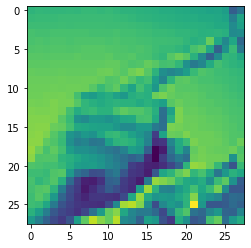

In [ ]:
import matplotlib.pyplot as plt
img=training_images[1]
#training_images→(27455,28,28,1)27455枚で28*28でグレー
plt.imshow(img.reshape(28,28))
plt.show()

In [ ]:
model = tf.keras.models.Sequential([                              
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    #26のクラスに分類分け
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)]
    )
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(training_images, training_labels,batch_size=32),
                    steps_per_epoch=len(training_images)/32,
                    epochs=15,
                    validation_data=validation_datagen.flow(testing_images,testing_labels,batch_size=32),
                    validation_steps=len(testing_images)/32)
model.evaluate(testing_images, testing_labels)

Epoch 1/15
857/857 [==============================] - 9s 10ms/step - loss: 2.8378 - accuracy: 0.1409 - val_loss: 2.3286 - val_accuracy: 0.2366
Epoch 2/15
857/857 [==============================] - 9s 10ms/step - loss: 2.2100 - accuracy: 0.3038 - val_loss: 1.6337 - val_accuracy: 0.4866
Epoch 3/15
857/857 [==============================] - 9s 10ms/step - loss: 1.8896 - accuracy: 0.3983 - val_loss: 1.4570 - val_accuracy: 0.4898
Epoch 4/15
857/857 [==============================] - 9s 10ms/step - loss: 1.6644 - accuracy: 0.4599 - val_loss: 1.2540 - val_accuracy: 0.5623
Epoch 5/15
857/857 [==============================] - 9s 10ms/step - loss: 1.4966 - accuracy: 0.5111 - val_loss: 1.0395 - val_accuracy: 0.6233
Epoch 6/15
857/857 [==============================] - 9s 10ms/step - loss: 1.3728 - accuracy: 0.5494 - val_loss: 0.8279 - val_accuracy: 0.6871
Epoch 7/15
857/857 [==============================] - 9s 10ms/step - loss: 1.2813 - accuracy: 0.5810 - val_loss: 0.7782 - val_accuracy: 0.7133

[309.3313903808594, 0.5085052847862244]

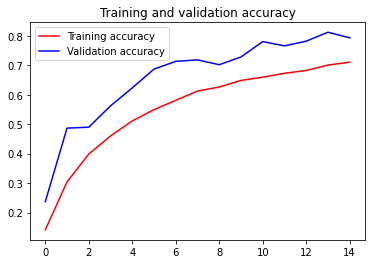

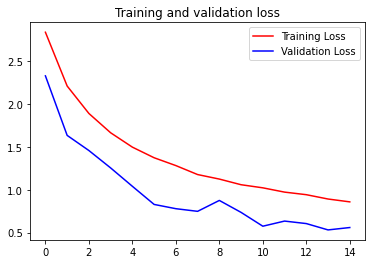

In [ ]:
import matplotlib.pyplot as plt
acc =history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()